### Data fields
-  **id** - a unique identifier for each trip
-  **vendor_id** - a code indicating the provider associated with the trip record
-  **pickup_datetime** - date and time when the meter was engaged
-  **dropoff_datetime** - date and time when the meter was disengaged
-  **passenger_count** - the number of passengers in the vehicle (driver entered value)
-  **pickup_longitude** - the longitude where the meter was engaged
-  **pickup_latitude** - the latitude where the meter was engaged
-  **dropoff_longitude** - the longitude where the meter was disengaged
-  **dropoff_latitude** - the latitude where the meter was disengaged
-  **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
-  **trip_duration** - duration of the trip in seconds

Disclaimer: The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels.

## References
-  https://github.com/sajal2692/data-science-portfolio/blob/master/911%20Calls%20-%20Exploratory%20Analysis.ipynb
-  https://www.kaggle.com/drgilermo/dynamics-of-new-york-city-animation

In [116]:
import pandas as pd

In [117]:
!pwd

/Users/saveriogzz/UCSD_MMDS/1_Python4DS/Week10 - project/nyc-taxi-trip-duration


In [118]:
!ls

Untitled.ipynb        test.csv              train.zip
sample_submission.csv test.zip
sample_submission.zip train.csv


In [119]:
train = pd.read_csv("./train.csv", sep = ',')

In [120]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [121]:
train.shape

(1458644, 11)

In [122]:
train.isnull().any()

id                    False
vendor_id             False
pickup_datetime       False
dropoff_datetime      False
passenger_count       False
pickup_longitude      False
pickup_latitude       False
dropoff_longitude     False
dropoff_latitude      False
store_and_fwd_flag    False
trip_duration         False
dtype: bool

In [123]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [124]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

In [125]:
train['pickup_hour'] = train['pickup_datetime'].apply(lambda x: x.hour)
train['pickup_month'] = train['pickup_datetime'].apply(lambda x: x.month)
train['pickup_dayofweek'] = train['pickup_datetime'].apply(lambda x: x.dayofweek)

In [126]:
train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_hour                    int64
pickup_month                   int64
pickup_dayofweek               int64
dtype: object

In [186]:
train[train['pickup_month'] > 5]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_month,pickup_dayofweek
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,6,6
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,22,6,4
13,id0799785,2,2016-06-01 20:58:29,2016-06-01 21:02:49,1,-73.956306,40.767941,-73.966110,40.763000,N,260,20,6,2
18,id3552682,1,2016-06-27 09:55:13,2016-06-27 10:17:10,1,-74.003983,40.713013,-73.979195,40.749924,N,1317,9,6,0
19,id3390316,2,2016-06-05 13:47:23,2016-06-05 13:51:34,1,-73.983887,40.738197,-73.991203,40.727871,N,251,13,6,6
23,id1603037,1,2016-06-25 10:36:26,2016-06-25 10:55:49,1,-73.993553,40.747173,-74.006142,40.704384,N,1163,10,6,5
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,2485,8,6,4
27,id2104175,1,2016-06-20 23:07:16,2016-06-20 23:18:50,1,-73.958435,40.713192,-73.949539,40.680252,N,694,23,6,0
28,id3973319,2,2016-06-13 21:57:27,2016-06-13 22:12:19,1,-73.994217,40.713306,-73.982849,40.692299,N,892,21,6,0
37,id2403238,1,2016-06-23 23:00:09,2016-06-23 23:04:46,1,-73.988068,40.728081,-73.980751,40.721470,N,277,23,6,3


### Some data viz

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = (10, 8)

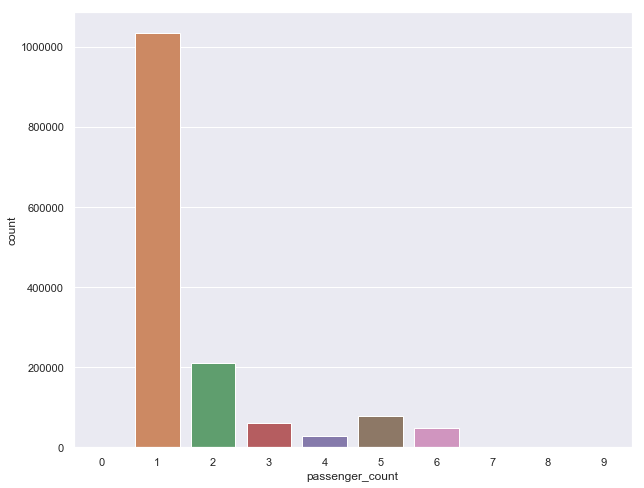

In [138]:
sns.countplot(train['passenger_count'])

In [174]:
percentage_onepass = (train[train['passenger_count'] == 1].count()[0])/(train[train['passenger_count'] >= 1].count()[0])*100

In [175]:
print('the travel with one passenger are the {} % of the total travels'.format(percentage_onepass))

the travel with one passenger are the 70.85913461274771 % of the total travels


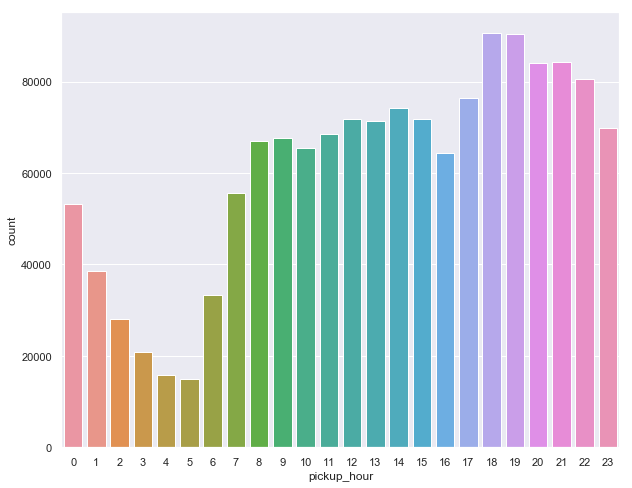

In [109]:
sns.countplot(train['pickup_hour'])

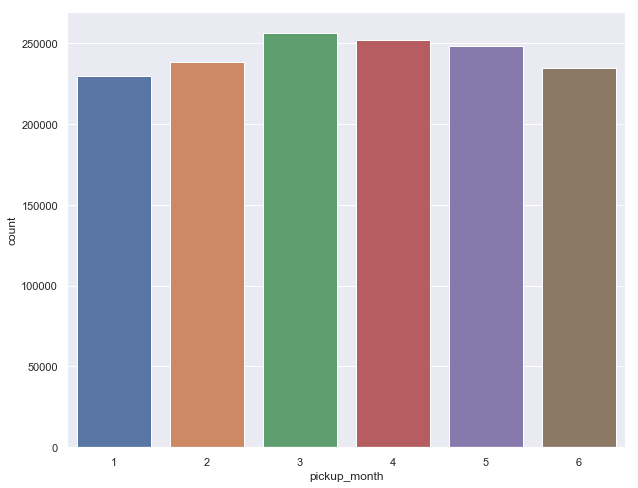

In [176]:
sns.countplot(train['pickup_month'])

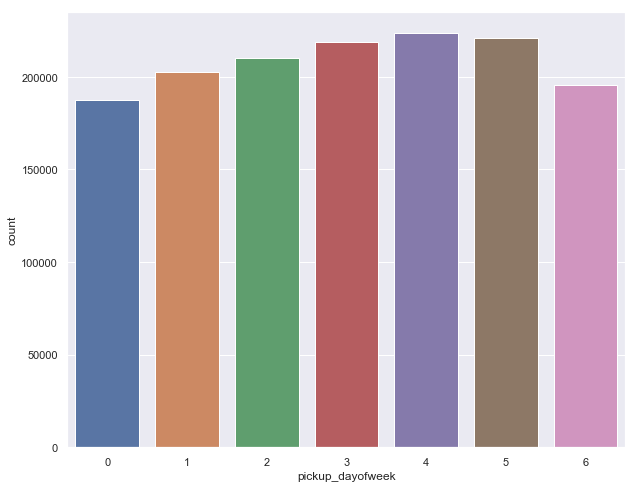

In [177]:
sns.countplot(train['pickup_dayofweek'])

In [195]:
train[(train.trip_duration/3600) > 10]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_month,pickup_dayofweek
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,84594,4,2,5
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,86149,18,5,5
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,86352,12,6,1
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,N,86236,0,2,5
4172,id3674870,2,2016-03-18 11:54:20,2016-03-19 11:34:17,1,-73.989090,40.736992,-73.972336,40.751511,N,85197,11,3,4
4336,id3632390,2,2016-06-08 08:54:33,2016-06-09 07:58:09,5,-73.980560,40.742466,-73.984718,40.748611,N,83016,8,6,2
5104,id3354426,2,2016-05-05 15:18:41,2016-05-06 15:11:07,1,-73.989037,40.773514,-73.980682,40.781521,N,85946,15,5,3
5778,id0773526,2,2016-04-02 14:58:45,2016-04-03 14:19:55,6,-73.987991,40.761341,-74.002922,40.756279,N,84070,14,4,5
6132,id3617210,2,2016-03-15 17:51:32,2016-03-16 17:18:04,1,-73.965607,40.765781,-73.972649,40.753418,N,84392,17,3,1
6513,id0067152,2,2016-02-27 21:04:05,2016-02-28 21:03:22,5,-73.993744,40.727444,-74.001335,40.729244,N,86357,21,2,5


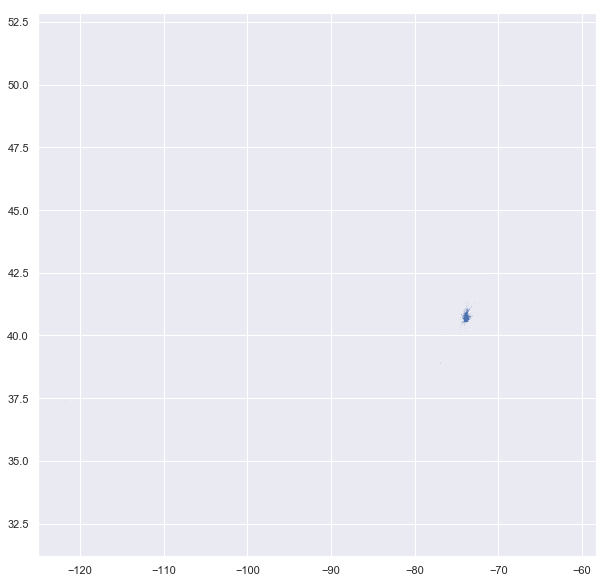

In [188]:
longitude = list(train.pickup_longitude) + list(train.dropoff_longitude)
latitude = list(train.pickup_latitude) + list(train.dropoff_latitude)
plt.figure(figsize = (10,10))
plt.plot(longitude,latitude,'.', alpha = 0.4, markersize = 0.05)
plt.show()